In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy
import xml.etree.ElementTree as ET
from glob import glob
import datetime
import ipywidgets as widgets
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# File selection & read

In [16]:
fto = []
for f in glob.iglob('/storage/experiments/2020/1204_ABSJets/Liulin/*.y*'): 
    fto.append(f)
    
w = widgets.Select(
    options=fto,
    rows=len(fto),
    layout={'width': 'max-content'},
    description='File:',
    disabled=False
)

display(w)

Select(description='File:', layout=Layout(width='max-content'), options=('/storage/experiments/2020/1204_ABSJe…

In [91]:
filename = w.value

# extract time
path = filename.split('/')
time = path[-1].split('.')
time = time[0].split('_')
print(time[0])
date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
print(date_object)

# read data
liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
liulin = liulin.drop(256, axis=1) # delete last empty column
infile = open(filename, 'r')
header = infile.readline()
print(header) # print data header
exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
exposition_val = float(exposition)
exposition += 'S'
print(exposition)

# compute time series
#dates = pd.date_range(date_object, freq='5T', periods=len(liulin)).tolist()


2012040515
2020-12-04 05:15:00
MDU-10  EXPOSITION = 10[sec]

10S


# Plot Flux

(0, 50)

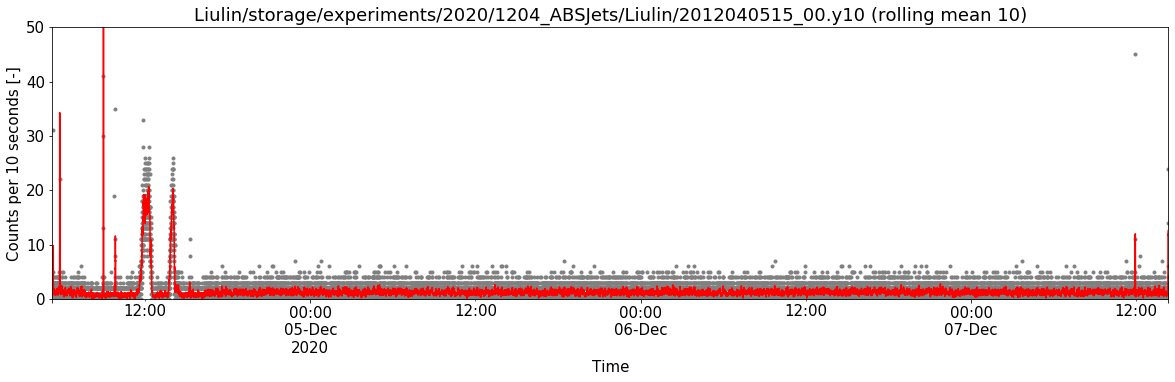

In [92]:
# index liulin data (compute time)
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.to_numpy())
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)

WINDOW = 10
liulin_data['flux_mean'] = liulin_data['flux'].rolling(WINDOW).mean()
#liulin_data['flux'] = liulin_data['flux'] 

#liulin_data
plt.figure(figsize=(20, 5))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(linestyle='', marker='.',color='gray')
liulin_data['flux_mean'].plot(drawstyle='steps', color='red')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts per 10 seconds [-]')
plt.xlabel('Time')
plt.ylim(0, 50)


# Plot Energy Spectrum

In [93]:
LOW_ENERGY = 0

e1 = ['2020-12-04 11:00:00','2020-12-04 14:00:00']

ener1 = liulin_data[e1[0]:e1[1]].sum()

e = pd.DataFrame()
e['1'] = ener1[:256]
e['index'] = ener1[:256].index
e['x'] =  linspace(0.0814/2, 20.7977, 256)



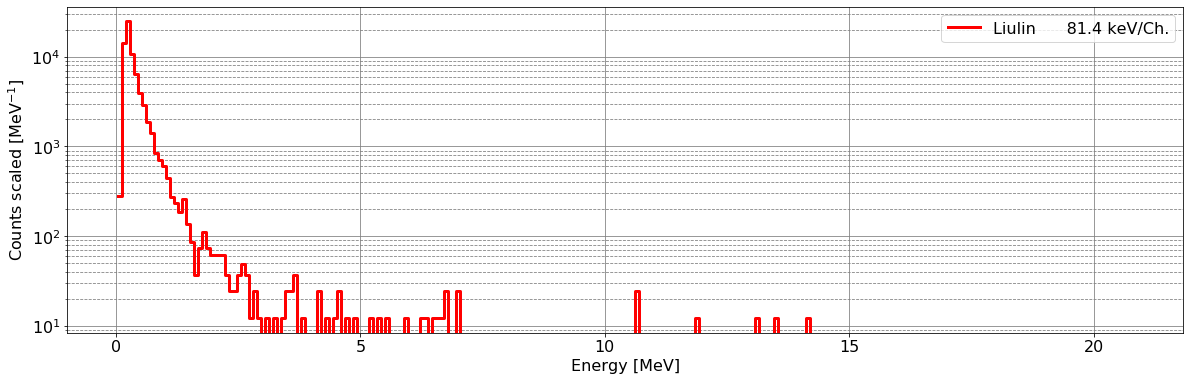

In [94]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(20,6))

e['norm'] = e['1']/0.0814 #/0.0692 #/(0.0814/0.0494)

plt.plot(e['x'],e['norm'], c='r', lw=3, drawstyle='steps-post', label='Liulin      81.4 keV/Ch.')

#plt.ylim(1, 10e6)
#plt.xlim(0, 13)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.legend()
#plt.title('Aircraft')
plt.grid(b=True, which='major', color='grey', linestyle='-')
plt.grid(b=True, which='minor', color='grey', linestyle='--')

plt.savefig("aircraft_spectra.pdf", format="pdf", bbox_inches='tight')